# Model Reproducibility

In this notebook I will reproduce one of the examples from the publication associated to the model and make sure the Ersilia Model Hub implementation is giving the same results.

In this task, I am trying to reproduce the result from this <a href = "https://pubs.acs.org/doi/full/10.1021/acs.jcim.8b00769">research publication</a>. From the list of given datasets, I am choosing the dataset of `Table S7`, which is detailed predictions for 49 approved antineoplastic drugs (including immunomodulating agents) by deephERG.

In [2]:
# Importing the necessary packages and specify the paths to relevant folders
import pandas as pd
from rdkit import RDLogger
import logging

import sys
sys.path.append('../src') 

# Disable warning messages
logging.getLogger("standardiser.standardise").setLevel(logging.ERROR)
RDLogger.DisableLog('rdApp.error')
RDLogger.DisableLog('rdApp.warning')

In [3]:
# Loading the predictions obtained from the original author's code implementation from the /data folder
original_data = pd.read_excel("../data/Table S7.xlsx",  engine="openpyxl", skiprows=1)

In [16]:
original_data.head(5)

,DrugBank ID,Smiles,Name,ATC category,Predicted negative probability,Predicted positive probability
0,DB11581,Clc1ccc(cc1)C=1CC(CCC=1CN1CCN(CC1)c1cc(Oc2cc3c...,Venetoclax,Other antineoplastic agents,0.165396,0.834604
1,DB11363,O1CCN(CC1)C1CCN(CC1)c1cc2c(cc1CC)C(=O)c1c([nH]...,Alectinib,Protein kinase inhibitors,0.058721,0.941279
2,DB09330,O(C)c1cc(N(CCN(C)C)C)c(NC(=O)C=C)cc1Nc1nc(ccn1...,Osimertinib,Protein kinase inhibitors,0.128660,0.871340
3,DB09143,P(O)(O)(O)=O.P(O)(O)(O)=O.FC(F)(F)Oc1ccc(cc1)-...,Sonidegib,Other antineoplastic agents,0.065729,0.934271
4,DB09079,OC/1=Nc2cc(ccc2\C\1=C(\Nc1ccc(N(C(=O)CN2CCN(CC...,Nintedanib,Protein kinase inhibitors,0.338969,0.661031


In [4]:
# Recreating the figure or value I am to reproduce, for example an AUROC
from smiles_processing import standardise_smiles, smile_to_inchikey

columns_drop = ['DrugBank ID', 'Name', 'ATC category', 'Predicted negative probability']
original_data.drop(columns=columns_drop, inplace=True)
original_data['standardise_smiles'] = original_data['Smiles'].apply(standardise_smiles)
original_data = original_data.dropna(subset=['standardise_smiles'])
original_data['inchi_key'] = original_data['standardise_smiles'].apply(smile_to_inchikey)
original_data = original_data.dropna(subset=['inchi_key'])
order = ['Smiles','standardise_smiles', 'inchi_key','Predicted positive probability']
original_data = original_data[order]

In [5]:
original_data.head(5)

,Smiles,standardise_smiles,inchi_key,Predicted positive probability
0,Clc1ccc(cc1)C=1CC(CCC=1CN1CCN(CC1)c1cc(Oc2cc3c...,CC1(C)CCC(CN2CCN(c3ccc(C(=O)NS(=O)(=O)c4ccc(NC...,LQBVNQSMGBZMKD-UHFFFAOYSA-N,0.834604
1,O1CCN(CC1)C1CCN(CC1)c1cc2c(cc1CC)C(=O)c1c([nH]...,CCc1cc2c(cc1N1CCC(N3CCOCC3)CC1)C(C)(C)c1[nH]c3...,KDGFLJKFZUIJMX-UHFFFAOYSA-N,0.941279
2,O(C)c1cc(N(CCN(C)C)C)c(NC(=O)C=C)cc1Nc1nc(ccn1...,C=CC(=O)Nc1cc(Nc2nccc(-c3cn(C)c4ccccc34)n2)c(O...,DUYJMQONPNNFPI-UHFFFAOYSA-N,0.871340
3,P(O)(O)(O)=O.P(O)(O)(O)=O.FC(F)(F)Oc1ccc(cc1)-...,Cc1c(C(O)=Nc2ccc(N3C[C@@H](C)O[C@@H](C)C3)nc2)...,RWIVSVMMGFFZIJ-VWDRLOGHSA-N,0.934271
4,OC/1=Nc2cc(ccc2\C\1=C(\Nc1ccc(N(C(=O)CN2CCN(CC...,COC(=O)c1ccc2c(c1)N=C(O)/C2=C(\Nc1ccc(N(C)C(=O...,XZXHXSATPCNXJR-ZIADKAODSA-N,0.661031


In [19]:
# Processing the data for predictions and saving it
cols = ['Smiles','standardise_smiles','inchi_key']
processed_data = original_data[cols]
processed_data.to_csv('../data/processed_S7.csv', index=False)

In [20]:
# Checking the data
df = pd.read_csv("../data/processed_S7.csv")
df.head(5)

,Smiles,standardise_smiles,inchi_key
0,Clc1ccc(cc1)C=1CC(CCC=1CN1CCN(CC1)c1cc(Oc2cc3c...,CC1(C)CCC(CN2CCN(c3ccc(C(=O)NS(=O)(=O)c4ccc(NC...,LQBVNQSMGBZMKD-UHFFFAOYSA-N
1,O1CCN(CC1)C1CCN(CC1)c1cc2c(cc1CC)C(=O)c1c([nH]...,CCc1cc2c(cc1N1CCC(N3CCOCC3)CC1)C(C)(C)c1[nH]c3...,KDGFLJKFZUIJMX-UHFFFAOYSA-N
2,O(C)c1cc(N(CCN(C)C)C)c(NC(=O)C=C)cc1Nc1nc(ccn1...,C=CC(=O)Nc1cc(Nc2nccc(-c3cn(C)c4ccccc34)n2)c(O...,DUYJMQONPNNFPI-UHFFFAOYSA-N
3,P(O)(O)(O)=O.P(O)(O)(O)=O.FC(F)(F)Oc1ccc(cc1)-...,Cc1c(C(O)=Nc2ccc(N3C[C@@H](C)O[C@@H](C)C3)nc2)...,RWIVSVMMGFFZIJ-VWDRLOGHSA-N
4,OC/1=Nc2cc(ccc2\C\1=C(\Nc1ccc(N(C(=O)CN2CCN(CC...,COC(=O)c1ccc2c(c1)N=C(O)/C2=C(\Nc1ccc(N(C)C(=O...,XZXHXSATPCNXJR-ZIADKAODSA-N


After analysing and processing the above data, below is my attempt to reproduce the results of the dataset.

In [1]:
# Loading the predictions obtained from the Ersilia Model Hub implementation saved in the /data folder
import time
from ersilia import ErsiliaModel

# Fetching and serving the model
model_name = "eos30gr" #deepherg
start = time.time()
mdl = ErsiliaModel(model_name)
end = time.time()
print("Model fetched. Time taken:", end - start)

Requested model eos30gr is not available locally. Do you want to fetch it? [Y/n]


sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit


[]


sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit


🚀 Serving model eos30gr: deepherg

   URL: http://127.0.0.1:41983
   PID: 4984
   SRV: conda

👉 To run model:
   - run

💁 Information:
   - info
⛔ Model eos30gr closed
Model fetched. Time taken: 163.01437425613403


sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit


In [4]:
# Loading data
data = pd.read_csv("../data/processed_S7.csv")

# Running the model
mdl.serve()
start = time.time()
st_smiles = list(data['standardise_smiles'])
output = mdl.run(st_smiles, output = "pandas")
end = time.time()
print("Predictions calculated. Time taken:", end - start)
mdl.close()

sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit


Predictions calculated. Time taken: 12.97640609741211


sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit


In [5]:
output.head()

,key,input,activity10
0,LQBVNQSMGBZMKD-UHFFFAOYSA-N,CC1(C)CCC(CN2CCN(c3ccc(C(=O)NS(=O)(=O)c4ccc(NC...,0.440594
1,KDGFLJKFZUIJMX-UHFFFAOYSA-N,CCc1cc2c(cc1N1CCC(N3CCOCC3)CC1)C(C)(C)c1[nH]c3...,0.623762
2,DUYJMQONPNNFPI-UHFFFAOYSA-N,C=CC(=O)Nc1cc(Nc2nccc(-c3cn(C)c4ccccc34)n2)c(O...,0.481848
3,RWIVSVMMGFFZIJ-VWDRLOGHSA-N,Cc1c(C(O)=Nc2ccc(N3C[C@@H](C)O[C@@H](C)C3)nc2)...,0.524752
4,XZXHXSATPCNXJR-ZIADKAODSA-N,COC(=O)c1ccc2c(c1)N=C(O)/C2=C(\Nc1ccc(N(C)C(=O...,0.485149


In [7]:
output.rename(columns = {'activity10' : 'Predicted positive probability'}, inplace = True)
output.head(5)

,key,input,Predicted positive probability
0,LQBVNQSMGBZMKD-UHFFFAOYSA-N,CC1(C)CCC(CN2CCN(c3ccc(C(=O)NS(=O)(=O)c4ccc(NC...,0.440594
1,KDGFLJKFZUIJMX-UHFFFAOYSA-N,CCc1cc2c(cc1N1CCC(N3CCOCC3)CC1)C(C)(C)c1[nH]c3...,0.623762
2,DUYJMQONPNNFPI-UHFFFAOYSA-N,C=CC(=O)Nc1cc(Nc2nccc(-c3cn(C)c4ccccc34)n2)c(O...,0.481848
3,RWIVSVMMGFFZIJ-VWDRLOGHSA-N,Cc1c(C(O)=Nc2ccc(N3C[C@@H](C)O[C@@H](C)C3)nc2)...,0.524752
4,XZXHXSATPCNXJR-ZIADKAODSA-N,COC(=O)c1ccc2c(c1)N=C(O)/C2=C(\Nc1ccc(N(C)C(=O...,0.485149


In [8]:
output.to_csv('../data/eos30gr_predictions.csv', index = False)

After getting my predictions after running the model, I will be comparing the results of both the graphs using `matplotlib` library.

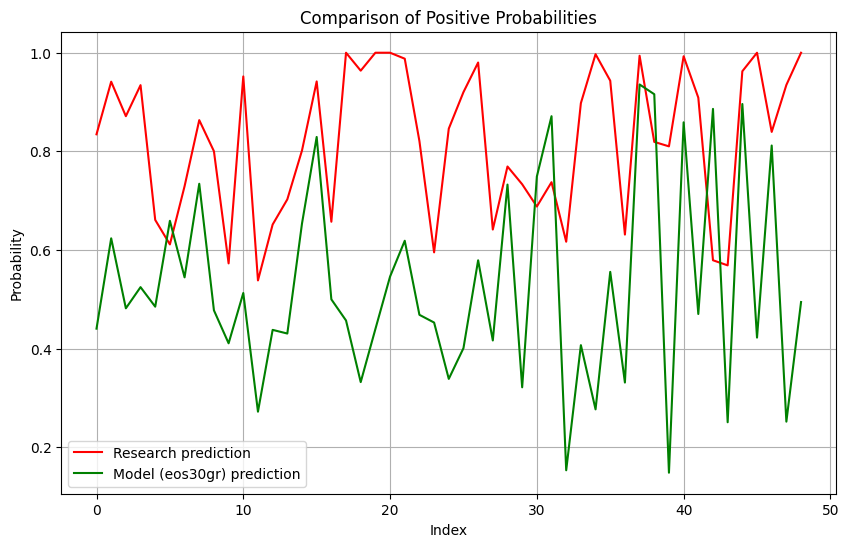

In [15]:
# Comparing the original implementation vs the EMH result
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(original_data['Predicted positive probability'], color = 'red', label='Research prediction')
plt.plot(output['Predicted positive probability'], color = 'green', label='Model (eos30gr) prediction')
plt.xlabel('Index')
plt.ylabel('Probability')
plt.title('Comparison of Positive Probabilities')
plt.grid(True)
plt.savefig('../plots/positive_probabilites_comparison.png')
plt.legend()

plt.show()

In [6]:
original_data['Predicted negative probability'] = 1 - original_data['Predicted positive probability']
output['Predicted negative probability'] = 1 - output['Predicted positive probability']

In [7]:
original_data.head(5)

,Smiles,standardise_smiles,inchi_key,Predicted positive probability,Predicted negative probability
0,Clc1ccc(cc1)C=1CC(CCC=1CN1CCN(CC1)c1cc(Oc2cc3c...,CC1(C)CCC(CN2CCN(c3ccc(C(=O)NS(=O)(=O)c4ccc(NC...,LQBVNQSMGBZMKD-UHFFFAOYSA-N,0.834604,0.165396
1,O1CCN(CC1)C1CCN(CC1)c1cc2c(cc1CC)C(=O)c1c([nH]...,CCc1cc2c(cc1N1CCC(N3CCOCC3)CC1)C(C)(C)c1[nH]c3...,KDGFLJKFZUIJMX-UHFFFAOYSA-N,0.941279,0.058721
2,O(C)c1cc(N(CCN(C)C)C)c(NC(=O)C=C)cc1Nc1nc(ccn1...,C=CC(=O)Nc1cc(Nc2nccc(-c3cn(C)c4ccccc34)n2)c(O...,DUYJMQONPNNFPI-UHFFFAOYSA-N,0.871340,0.128660
3,P(O)(O)(O)=O.P(O)(O)(O)=O.FC(F)(F)Oc1ccc(cc1)-...,Cc1c(C(O)=Nc2ccc(N3C[C@@H](C)O[C@@H](C)C3)nc2)...,RWIVSVMMGFFZIJ-VWDRLOGHSA-N,0.934271,0.065729
4,OC/1=Nc2cc(ccc2\C\1=C(\Nc1ccc(N(C(=O)CN2CCN(CC...,COC(=O)c1ccc2c(c1)N=C(O)/C2=C(\Nc1ccc(N(C)C(=O...,XZXHXSATPCNXJR-ZIADKAODSA-N,0.661031,0.338969


In [8]:
output.head(5)

,key,input,Predicted positive probability,Predicted negative probability
0,LQBVNQSMGBZMKD-UHFFFAOYSA-N,CC1(C)CCC(CN2CCN(c3ccc(C(=O)NS(=O)(=O)c4ccc(NC...,0.440594,0.559406
1,KDGFLJKFZUIJMX-UHFFFAOYSA-N,CCc1cc2c(cc1N1CCC(N3CCOCC3)CC1)C(C)(C)c1[nH]c3...,0.623762,0.376238
2,DUYJMQONPNNFPI-UHFFFAOYSA-N,C=CC(=O)Nc1cc(Nc2nccc(-c3cn(C)c4ccccc34)n2)c(O...,0.481848,0.518152
3,RWIVSVMMGFFZIJ-VWDRLOGHSA-N,Cc1c(C(O)=Nc2ccc(N3C[C@@H](C)O[C@@H](C)C3)nc2)...,0.524752,0.475248
4,XZXHXSATPCNXJR-ZIADKAODSA-N,COC(=O)c1ccc2c(c1)N=C(O)/C2=C(\Nc1ccc(N(C)C(=O...,0.485149,0.514851


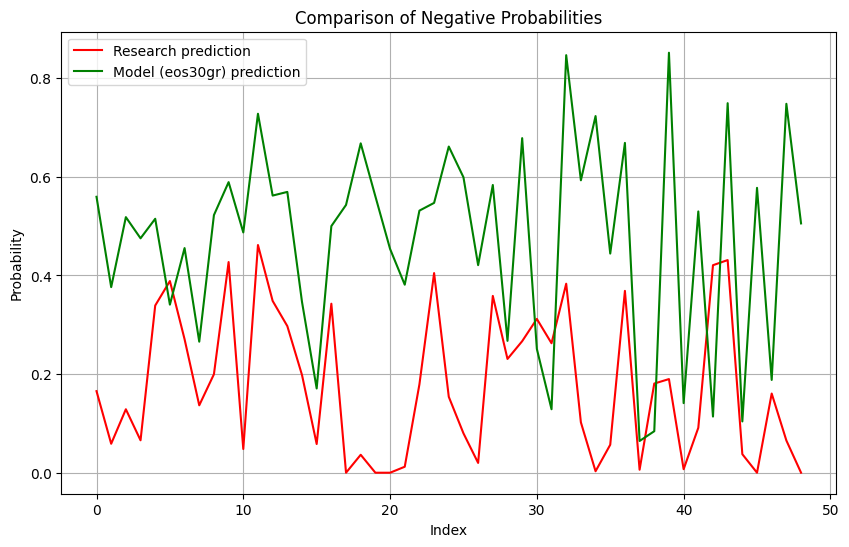

In [20]:
# Comparing the original implementation vs the EMH result
plt.figure(figsize=(10, 6))
plt.plot(original_data['Predicted negative probability'], color = 'red', label='Research prediction')
plt.plot(output['Predicted negative probability'], color = 'green', label='Model (eos30gr) prediction')
plt.xlabel('Index')
plt.ylabel('Probability')
plt.title('Comparison of Negative Probabilities')
plt.grid(True)
plt.savefig('../plots/negative_probabilites_comparison.png')
plt.legend()
plt.show()

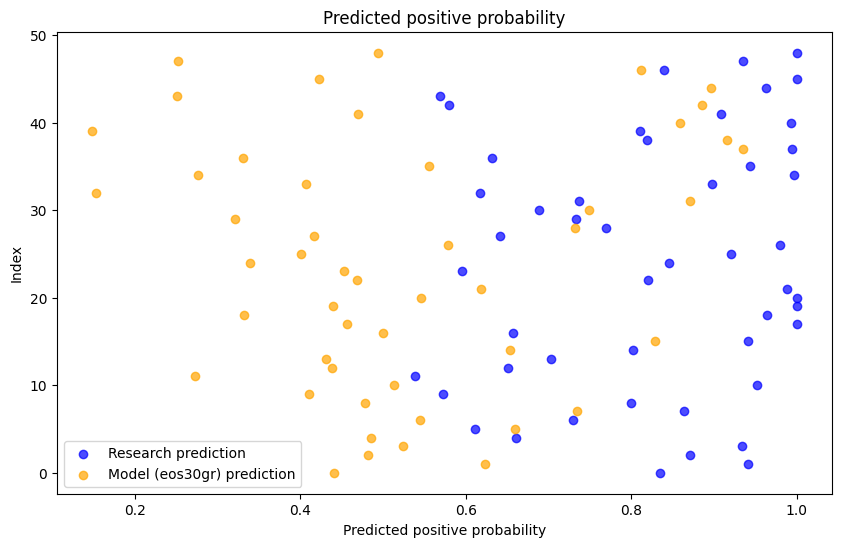

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(original_data['Predicted positive probability'], original_data.index, color = 'blue', marker = 'o', label = 'Research prediction', alpha = 0.7)
plt.scatter(output['Predicted positive probability'], output.index, color = 'orange', marker = 'o', label = 'Model (eos30gr) prediction', alpha = 0.7)
plt.xlabel('Predicted positive probability')
plt.ylabel('Index')
plt.title('Predicted positive probability')
plt.savefig('../plots/scatter_research_predictions.png')
plt.legend()
plt.show()

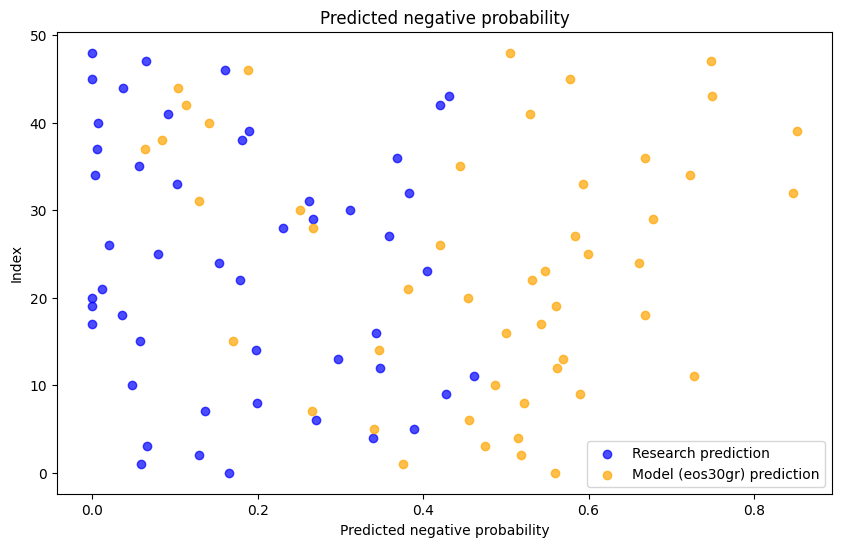

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(original_data['Predicted negative probability'], original_data.index, color = 'blue', marker = 'o', label = 'Research prediction', alpha = 0.7)
plt.scatter(output['Predicted negative probability'], output.index, color = 'orange', marker = 'o', label = 'Model (eos30gr) prediction', alpha = 0.7)
plt.xlabel('Predicted negative probability')
plt.ylabel('Index')
plt.title('Predicted negative probability')
plt.savefig('../plots/scatter_research_predictions_negative.png')
plt.legend()
plt.show()

- From the above graphs, we notice a wide deviation of our predicted data from the original research data.
- Hence, the chosen dataset was not reproducible by our model `eos30gr`.
- From the scatter plot of the first graph, we see that all of the compounds are above the 50% threshold and hence, according to the original research data, all of them are hERG blockers.
- However, only about half of them are shown to be hERG blocker by our model.